# 3~5시에 스타벅스 방문한 사람 찾기

In [3]:
# starbucks id
import pymysql,pandas as pd
conn = pymysql.connect(host='192.168.0.50', port=3306, user='eums', password='eums00!q', db='eums-shared', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor)
curs.execute("select ID FROM MEUMS_COMPANY where CO_NAME regexp '스타벅스';")
comp_p = pd.DataFrame( curs.fetchall() )#[['ID','CO_NAME','CATE','CATE1','ADDR']]
conn.close()
print(comp_p.shape)
comp_p.head()

(1146, 1)


,ID
0,8017034
1,561760
2,5108332
3,6021337
4,7742346


In [40]:
# starbucks user(15~17pm) 
import pymysql, pandas as pd
conn = pymysql.connect(host='192.168.0.50', port=3306, user='eums', password='eums00!q', db='eums-cj-business', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor)
curs.execute("select * from MEUMS_COMP_REVISIT_HIS WHERE ID between 0 and 100000;")
data = pd.DataFrame( curs.fetchall() ) #[['EPOPCON_ID','COMPANY_ID','DEAL_DT','CARD_NAME','PAYMENT']]
conn.close()
data.head()

ValueError: DataFrame constructor not properly called!

# cjcis15a3933b371e42756fbe7c4a2가 방문한 상점 보기

In [5]:
conn = pymysql.connect(host='133.186.135.222', port=13306, user='eums', password='eums00!q',db='eums-business', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor)
curs.execute("select * from MEUMS_COMP_REVISIT_HIS WHERE EPOPCON_ID = 'cjcis15a3933b371e42756fbe7c4a2' ;")
comp_p = pd.DataFrame( curs.fetchall() )[['DEAL_DT','COMPANY_ID','CARD_NAME','PAYMENT']]
conn.close()
print(comp_p.shape)
comp_p.head()

(287, 4)


,DEAL_DT,COMPANY_ID,CARD_NAME,PAYMENT
0,2018-01-01 18:33:31,26989,우리카드(6573),7700
1,2018-02-16 22:22:15,26989,우리카드(6573),9450
2,2018-02-11 22:30:03,26994,우리카드(6573),4500
3,2018-03-22 23:29:04,34629,우리카드(6573),9000
4,2018-02-06 17:18:18,150993,우리카드(6573),10100


In [6]:
str(tuple(comp_p.COMPANY_ID.unique()))

'(26989, 26994, 34629, 150993, 194574, 202046, 267153, 322549, 328068, 334596, 391690, 423576, 433105, 445806, 469857, 590669, 710170, 729813, 762740, 783107, 854704, 875271, 945059, 954048, 2502184, 2974922, 3642111, 4449372, 4684905, 4984806, 5052755, 5110819, 5277068, 5364720, 5404044, 5438916, 5638264, 5817539, 5817550, 5823451, 5857475, 5896458, 5924419, 6021121, 6042092, 6258709, 6448290, 6661243, 6710959, 6738739, 6764996, 6890435, 6950135, 7040037, 7090925, 7248056, 7499101, 7516943, 7564964, 7594831, 7706255, 7764778, 7807515, 7846162, 7959501, 8056252, 8061960, 8062913, 8069897, 8113676, 8121579, 8121588, 8130489, 8140358, 8150322, 8180800, 8248591, 8255961, 8316842, 8345940)'

In [8]:
conn = pymysql.connect(host='133.186.143.151', port=13306, user='eums', password='eums00!q', db='eums-shared', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor)
curs.execute("select * FROM MEUMS_COMPANY where ID IN "+str(tuple(comp_p.COMPANY_ID.unique()))+";")
company = pd.DataFrame( curs.fetchall() )[['ID','CO_NAME','CATE','CATE1','ADDR']]
conn.close()
print(company.shape)
company.head()

(80, 5)


,ID,CO_NAME,CATE,CATE1,ADDR
0,26989,CU 백마5단지점,마트,편의점,경기 고양시 일산동구 마두동 717 백마마을분산상가동 102~104
1,26994,CU 백석밀라트점,마트,편의점,경기 고양시 일산동구 백석동 1303-1 현대밀라트2차A동1층5-1호
2,34629,GS25 서정마을점,마트,편의점,"경기 고양시 덕양구 서정마을1로4-13, 행신지구상업용지 B-7블럭 103호 (행..."
3,150993,김영숙피부과,의료/건강,병원,경기 고양시 일산동구 백석동 1194
4,194574,누리마을감자탕 구로점,외식,한식,서울 구로구 구로동 1124-77


In [12]:
company['COMPANY_ID']=company['ID']
del company['ID']

# Merge

In [13]:
train = pd.merge(comp_p,company, how='inner', on = ['COMPANY_ID'])
print(train.shape)
train.head()

(287, 8)


,DEAL_DT,COMPANY_ID,CARD_NAME,PAYMENT,CO_NAME,CATE,CATE1,ADDR
0,2018-01-01 18:33:31,26989,우리카드(6573),7700,CU 백마5단지점,마트,편의점,경기 고양시 일산동구 마두동 717 백마마을분산상가동 102~104
1,2018-02-16 22:22:15,26989,우리카드(6573),9450,CU 백마5단지점,마트,편의점,경기 고양시 일산동구 마두동 717 백마마을분산상가동 102~104
2,2018-02-11 22:30:03,26994,우리카드(6573),4500,CU 백석밀라트점,마트,편의점,경기 고양시 일산동구 백석동 1303-1 현대밀라트2차A동1층5-1호
3,2018-03-22 23:29:04,34629,우리카드(6573),9000,GS25 서정마을점,마트,편의점,"경기 고양시 덕양구 서정마을1로4-13, 행신지구상업용지 B-7블럭 103호 (행..."
4,2018-02-06 17:18:18,150993,우리카드(6573),10100,김영숙피부과,의료/건강,병원,경기 고양시 일산동구 백석동 1194


In [42]:
#train.sort(['DEAL_DT','CATE'])
train = train.sort_values(by=['DEAL_DT','CATE'])
train_temp = train[train['CO_NAME']!='택시']
print(train_temp.shape)
train_temp.head(50)

(159, 9)


,DEAL_DT,COMPANY_ID,CARD_NAME,PAYMENT,CO_NAME,CATE,CATE1,ADDR,LATITUDE
0,2017-12-23 18:38:42,5072946,롯데카드(5*2*),65000,ABC마트 ST 명동점,패션,신발,서울특별시 중구 명동1가 59-1,37.5644563
2,2017-12-23 20:31:58,920969,부산BC(8904),14700,크레아에스프레소,카페/디저트,카페,부산 사상구 괘법동 928-19,35.1671926
1,2017-12-24 13:54:06,5072946,롯데카드(5*2*),4000,ABC마트 ST 명동점,패션,신발,서울특별시 중구 명동1가 59-1,37.5644563
3,2017-12-24 14:42:21,604881,롯데카드(5*2*),8800,아마스빈하단 동아대점,카페/디저트,카페,부산 사하구 하단동 497-28,35.11077189295135
4,2017-12-24 19:12:24,6253292,부산BC(8904),10100,한아름 마트,마트,슈퍼마켓,서울 용산구 후암동 115-1,37.55003089760918


In [43]:
train_temp.head(50)

,DEAL_DT,COMPANY_ID,CARD_NAME,PAYMENT,CO_NAME,CATE,CATE1,ADDR,LATITUDE
0,2017-12-23 18:38:42,5072946,롯데카드(5*2*),65000,ABC마트 ST 명동점,패션,신발,서울특별시 중구 명동1가 59-1,37.5644563
2,2017-12-23 20:31:58,920969,부산BC(8904),14700,크레아에스프레소,카페/디저트,카페,부산 사상구 괘법동 928-19,35.1671926
1,2017-12-24 13:54:06,5072946,롯데카드(5*2*),4000,ABC마트 ST 명동점,패션,신발,서울특별시 중구 명동1가 59-1,37.5644563
3,2017-12-24 14:42:21,604881,롯데카드(5*2*),8800,아마스빈하단 동아대점,카페/디저트,카페,부산 사하구 하단동 497-28,35.11077189295135
4,2017-12-24 19:12:24,6253292,부산BC(8904),10100,한아름 마트,마트,슈퍼마켓,서울 용산구 후암동 115-1,37.55003089760918
21,2017-12-25 21:24:28,7221463,부산BC(8904),8100,맥도날드 부산엄궁DT점,외식,패스트푸드,부산 사상구 엄궁동 367-3,35.1280751
23,2017-12-26 14:31:23,5573910,부산BC(8904),19000,호식이두마리치킨독립문점,외식,치킨,서울특별시 서대문구 냉천동 27-6,37.5674345
24,2017-12-26 16:34:59,7117097,부산BC(8904),45640,롯데마트 사상점 공무원복지,마트,대형마트,부산 사상구 엄궁동 690,35.12754491228754
35,2017-12-28 14:00:08,5951670,부산BC(8904),21000,애플아울렛 푸드코트,외식,푸드코트,부산 사상구 괘법동 534-1,35.163165277557226
36,2017-12-28 16:09:06,3568967,부산BC(8904),266000,최강MTM보습학원,교육,학원,서울 강동구 고덕2동 258-9번지,37.5606958


# cjcis15a3a6205e946d90511c9881d

In [21]:
conn = pymysql.connect(host='133.186.135.222', port=13306, user='eums', password='eums00!q',db='eums-business', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor)
curs.execute("select * from MEUMS_COMP_REVISIT_HIS WHERE EPOPCON_ID = 'cjcis15a3a6205e946d90511c9881d' ;")
comp_p = pd.DataFrame( curs.fetchall() )[['DEAL_DT','COMPANY_ID','CARD_NAME','PAYMENT']]
conn.close()
print(comp_p.shape)
comp_p.head()

(160, 4)


,DEAL_DT,COMPANY_ID,CARD_NAME,PAYMENT
0,2017-12-23 18:38:42,5072946,롯데카드(5*2*),65000
1,2017-12-23 20:31:58,920969,부산BC(8904),14700
2,2017-12-24 13:54:06,5072946,롯데카드(5*2*),4000
3,2017-12-24 14:42:21,604881,롯데카드(5*2*),8800
4,2017-12-24 19:12:24,6253292,부산BC(8904),10100


In [27]:
conn = pymysql.connect(host='133.186.143.151', port=13306, user='eums', password='eums00!q', db='eums-shared', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor)
curs.execute("select * FROM MEUMS_COMPANY where ID IN "+str(tuple(comp_p.COMPANY_ID.unique()))+";")
company = pd.DataFrame( curs.fetchall() )[['ID','CO_NAME','CATE','CATE1','ADDR','LATITUDE']]
conn.close()

company['COMPANY_ID']=company['ID']
del company['ID']

print(company.shape)
company.head()

(82, 6)


,CO_NAME,CATE,CATE1,ADDR,LATITUDE,COMPANY_ID
0,11번가,온라인쇼핑,온라인쇼핑,경기도 성남시 분당구 판교로 264,37.4967904,14366
1,CU 괘법광장점,마트,편의점,부산광역시 사상구 괘법동 543-19번지,35.1628664699,25707
2,네이버,온라인쇼핑,온라인쇼핑,경기 성남시 분당구 정자동 178-1 NAVER 그린팩토리 1층,37.3595122,46177
3,가락타운주유소,교통,주유소,부산광역시 사상구 엄궁동 158-1,35.1262318,59238
4,김세일한의원,의료/건강,병원,부산 사상구 엄궁동 503-1,35.12935651709133,150193


In [33]:
train = pd.merge(comp_p,company, how='inner', on = ['COMPANY_ID'])
print(train.shape)
train_seoul = train[train['LATITUDE'].astype('float')>36.5]
train_non_seoul = train[train['LATITUDE'].astype('float')<=36.5]
train_seoul.sort_values(by=['DEAL_DT','CATE']).head(50)

(160, 9)


,DEAL_DT,COMPANY_ID,CARD_NAME,PAYMENT,CO_NAME,CATE,CATE1,ADDR,LATITUDE
0,2017-12-23 18:38:42,5072946,롯데카드(5*2*),65000,ABC마트 ST 명동점,패션,신발,서울특별시 중구 명동1가 59-1,37.5644563
1,2017-12-24 13:54:06,5072946,롯데카드(5*2*),4000,ABC마트 ST 명동점,패션,신발,서울특별시 중구 명동1가 59-1,37.5644563
4,2017-12-24 19:12:24,6253292,부산BC(8904),10100,한아름 마트,마트,슈퍼마켓,서울 용산구 후암동 115-1,37.55003089760918
23,2017-12-26 14:31:23,5573910,부산BC(8904),19000,호식이두마리치킨독립문점,외식,치킨,서울특별시 서대문구 냉천동 27-6,37.5674345
36,2017-12-28 16:09:06,3568967,부산BC(8904),266000,최강MTM보습학원,교육,학원,서울 강동구 고덕2동 258-9번지,37.5606958
39,2017-12-29 17:54:16,2556881,부산BC(8904),24000,갤러리안경,의료/건강,안경,서울 강남구 압구정동 455 주구센타2호 102호,37.5319073
5,2017-12-29 19:17:32,6253292,부산BC(8904),10000,한아름 마트,마트,슈퍼마켓,서울 용산구 후암동 115-1,37.55003089760918
6,2018-01-02 23:04:23,6253292,부산BC(8904),5650,한아름 마트,마트,슈퍼마켓,서울 용산구 후암동 115-1,37.55003089760918
7,2018-01-02 23:05:27,6253292,부산BC(8904),2000,한아름 마트,마트,슈퍼마켓,서울 용산구 후암동 115-1,37.55003089760918
8,2018-01-03 12:33:35,6253292,부산BC(8904),2990,한아름 마트,마트,슈퍼마켓,서울 용산구 후암동 115-1,37.55003089760918


In [3]:
import pymysql, pandas as pd

In [ ]:
# 투썸 결제자

In [30]:
conn = pymysql.connect(host='133.186.143.151', port=13306, user='eums', password='eums00!q', db='eums-shared', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor)
curs.execute("select * FROM MEUMS_COMPANY where co_name regexp '스타벅스';")
starbucks = pd.DataFrame( curs.fetchall() )[['ID','CO_NAME','CATE','CATE1','ADDR']]
conn.close()
print(starbucks.shape)
starbucks.head()

KeyboardInterrupt: 

In [44]:
# 스타벅스 결제자

In [ ]:
conn = pymysql.connect(host='133.186.143.151', port=13306, user='eums', password='eums00!q', db='eums-shared', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor)
curs.execute("select * FROM MEUMS_COMPANY where co_name regexp '스타벅스';")

starbucks = pd.DataFrame( curs.fetchall() )[['ID','CO_NAME','CATE','CATE1','ADDR']]
conn.close()
print(starbucks.shape)
starbucks.head()

In [23]:
conn = pymysql.connect(host='133.186.135.222', port=13306, user='eums', password='eums00!q',db='eums-business', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor)
curs.execute("select * from MEUMS_COMP_REVISIT_HIS WHERE ID BETWEEN 91000000 and 92000000 ;") #89490814 AND 90000000
comp_p = pd.DataFrame( curs.fetchall() )[['EPOPCON_ID','DEAL_DT','COMPANY_ID','CARD_NAME','PAYMENT']]
conn.close()
print(comp_p.shape)
comp_p.head()

(986924, 5)


,EPOPCON_ID,DEAL_DT,COMPANY_ID,CARD_NAME,PAYMENT
0,cjcis15a3be1f371e4276922523a95,2017-04-11 12:54:21,6874104,우리카드(4948),7000
1,cjcis15a3be1f371e4276922523a95,2017-04-11 15:44:48,7185850,우리카드(3299),6000
2,cjcis15a3be1f371e4276922523a95,2017-04-11 15:51:02,331251,우리카드(3299),2000
3,cjcis15a3be1f371e4276922523a95,2017-04-12 13:46:58,6974348,KB국민카드(1*7*),6880
4,cjcis15a3be1f371e4276922523a95,2017-04-12 20:00:11,118450,우리카드(3299),50000


In [10]:
starbucks['COMPANY_ID']=starbucks['ID']
del starbucks['ID']

In [24]:
train = pd.merge(comp_p,starbucks, how='inner', on = ['COMPANY_ID'])
print(train.shape)
train.head()

(7155, 9)


,EPOPCON_ID,DEAL_DT,COMPANY_ID,CARD_NAME,PAYMENT,CO_NAME,CATE,CATE1,ADDR
0,cjcis15a3a7c22f652660632fc4e91,2017-02-23 18:41:02,946985,신한카드(9*9*),-8200,투썸플레이스 선릉ING점,카페/디저트,카페,서울 강남구 테헤란로 318 ING 오렌지타워 1층
1,cjcis15a3a7c22f652660632fc4e91,2017-02-23 18:41:29,946985,신한카드(9*9*),8200,투썸플레이스 선릉ING점,카페/디저트,카페,서울 강남구 테헤란로 318 ING 오렌지타워 1층
2,cjcis15a3a7c22f652660632fc4e91,2017-03-24 09:46:52,946985,신한카드(9*9*),3000,투썸플레이스 선릉ING점,카페/디저트,카페,서울 강남구 테헤란로 318 ING 오렌지타워 1층
3,cjcis15a3a7c22f652660632fc4e91,2017-06-16 16:55:54,946985,신한카드(9*9*),8200,투썸플레이스 선릉ING점,카페/디저트,카페,서울 강남구 테헤란로 318 ING 오렌지타워 1층
4,cjcis15a3a7c22f652660632fc4e91,2017-07-02 20:02:23,946985,신한카드(9*9*),5100,투썸플레이스 선릉ING점,카페/디저트,카페,서울 강남구 테헤란로 318 ING 오렌지타워 1층


#스타벅스 많이 사용한 사람 50명 걸러내기

In [25]:
top_customer = train.groupby('EPOPCON_ID').count().sort_values('DEAL_DT',ascending=False).reset_index()
top_epopcon_id = pd.DataFrame(top_customer['EPOPCON_ID'].head(50).unique())
print(top_epopcon_id.shape)
top_epopcon_id['EPOPCON_ID']= top_epopcon_id.iloc[:,0]
top_epopcon_id.head()

(50, 1)


,0,EPOPCON_ID
0,cjcis15a3982185a93f40965bcff1a,cjcis15a3982185a93f40965bcff1a
1,cjcis15a3a72b1b267561f3d74aebe,cjcis15a3a72b1b267561f3d74aebe
2,cjcis15a39d2796259ad0a9e3412be,cjcis15a39d2796259ad0a9e3412be
3,cjcis15a39f53071e42756fbe97708,cjcis15a39f53071e42756fbe97708
4,cjcis15a3c4fb26259ad1c6c85871d,cjcis15a3c4fb26259ad1c6c85871d


In [26]:
top_customer_data = pd.merge(train,top_epopcon_id, how='inner', on = 'EPOPCON_ID')
#del top_customer_data.iloc[:,6]
print(top_customer_data.shape)
top_customer_data.head()

#top_customer_data['deal_hr']=top_customer_data['DEAL_DT'].dt.hour
#top_customer_data[top_customer_data['DEAL_DT'].dt.hour>=15].head() # and top_customer_data['DEAL_DT'].dt.hour<=17

(1428, 10)


,EPOPCON_ID,DEAL_DT,COMPANY_ID,CARD_NAME,PAYMENT,CO_NAME,CATE,CATE1,ADDR,0
0,cjcis15a3a7c22f652660632fc4e91,2017-02-23 18:41:02,946985,신한카드(9*9*),-8200,투썸플레이스 선릉ING점,카페/디저트,카페,서울 강남구 테헤란로 318 ING 오렌지타워 1층,cjcis15a3a7c22f652660632fc4e91
1,cjcis15a3a7c22f652660632fc4e91,2017-02-23 18:41:29,946985,신한카드(9*9*),8200,투썸플레이스 선릉ING점,카페/디저트,카페,서울 강남구 테헤란로 318 ING 오렌지타워 1층,cjcis15a3a7c22f652660632fc4e91
2,cjcis15a3a7c22f652660632fc4e91,2017-03-24 09:46:52,946985,신한카드(9*9*),3000,투썸플레이스 선릉ING점,카페/디저트,카페,서울 강남구 테헤란로 318 ING 오렌지타워 1층,cjcis15a3a7c22f652660632fc4e91
3,cjcis15a3a7c22f652660632fc4e91,2017-06-16 16:55:54,946985,신한카드(9*9*),8200,투썸플레이스 선릉ING점,카페/디저트,카페,서울 강남구 테헤란로 318 ING 오렌지타워 1층,cjcis15a3a7c22f652660632fc4e91
4,cjcis15a3a7c22f652660632fc4e91,2017-07-02 20:02:23,946985,신한카드(9*9*),5100,투썸플레이스 선릉ING점,카페/디저트,카페,서울 강남구 테헤란로 318 ING 오렌지타워 1층,cjcis15a3a7c22f652660632fc4e91


In [27]:
#top_customer_data.to_csv('test.csv')
top_customer_data['deal_hour'] = top_customer_data['DEAL_DT'].dt.hour

In [28]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

figure, ax1 = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 8)
sns.countplot(data=top_customer_data, x="deal_hour", ax=ax1)



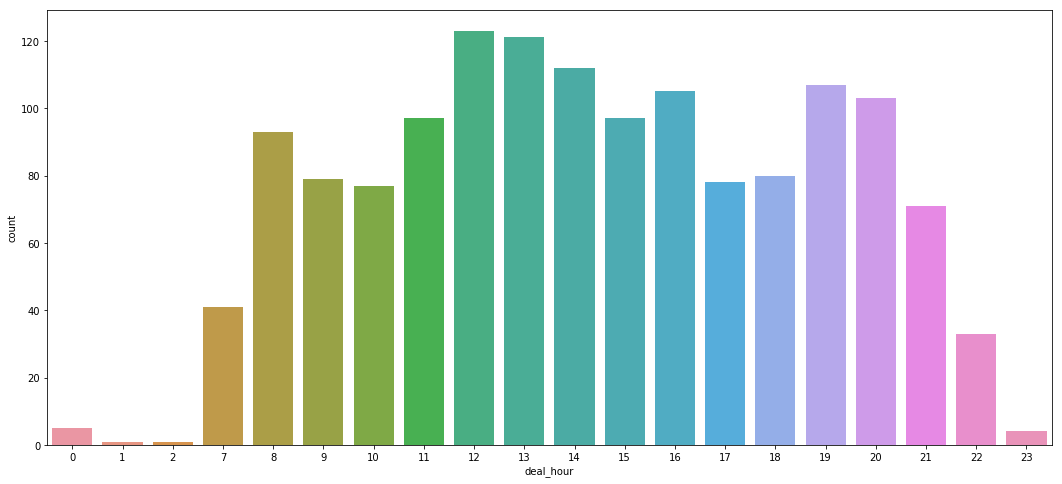

In [29]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 8)
sns.countplot(data=top_customer_data, x="deal_hour", ax=ax1)

